    https://blog.csdn.net/zangle260/article/details/52981008
    https://docs.opencv.org/master/d9/df8/tutorial_root.html
    https://docs.opencv.org/master/dd/dd7/tutorial_morph_lines_detection.html Extract horizontal and vertical lines by using morphological operations 重点看一下!!!!
    https://docs.opencv.org/master/d9/db0/tutorial_hough_lines.html 检测连续的直线
    https://docs.opencv.org/master/de/d3c/tutorial_out_of_focus_deblur_filter.html 恢复一个模糊的图片
    
    https://www.bogotobogo.com/python/OpenCV_Python/python_opencv3_Image_Gradient_Sobel_Laplacian_Derivatives_Edge_Detection.php


In [2]:
from __future__ import print_function
import cv2 as cv
import numpy as np
import argparse
import matplotlib.pyplot as plt
import time
import cv2
import math
plt.rcParams['figure.figsize'] = 15, 10

# python中PIL.Image和OpenCV图像格式相互转换

In [12]:
from PIL import Image
image = Image.open('D:/PROJECT_TW/git/data/example/image/0_0.jpg')
img = cv2.cvtColor(np.asarray(image),cv2.COLOR_RGB2BGR)
# img = cv2.imread('D:/PROJECT_TW/git/data/example/image/0_0.jpg',cv2.IMREAD_UNCHANGED)
print(img.shape)

(32, 32, 3)


# 膨脹 dilate

    https://docs.opencv.org/master/db/df6/tutorial_erosion_dilatation.html
    
    Mat getStructuringElement(int shape, Size ksize, Point anchor=Point(-1,-1))
    shape：模板形狀，有MORPH_RECT、MORPH_ELLIPSE、MORPH_CROSS三種可選。
    ksize：模板尺寸。  
    anchor	Anchor position within the element. The default value (−1,−1) means that the anchor is at the center. Note that only the shape of a cross-shaped element depends on the anchor position. In other cases the anchor just regulates how much the result of the morphological operation is shifted.

(494, 1641)


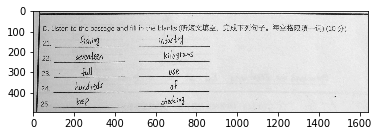

[[0 1 0]
 [1 1 1]
 [0 1 0]]


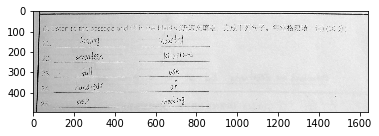

In [4]:
def dilatation(val):
#     dilatation_size = cv.getTrackbarPos(title_trackbar_kernel_size, title_dilatation_window)
    dilatation_type = 0
#     val_type = cv.getTrackbarPos(title_trackbar_element_type, title_dilatation_window)
    dilatation_size = 1
    val_type = val
    if val_type == 0:
        dilatation_type = cv.MORPH_RECT
    elif val_type == 1:
        dilatation_type = cv.MORPH_CROSS
    elif val_type == 2:
        dilatation_type = cv.MORPH_ELLIPSE
    element = cv.getStructuringElement(dilatation_type, (2*dilatation_size+1, 2*dilatation_size+1), (-1, -1))
    print(element)
    dilatation_dst = cv.dilate(src, element, iterations=1)
#     cv.imshow(dilatation_dst)
    plt.imshow(dilatation_dst,'gray')
    plt.show()
    return dilatation_dst

src = cv.imread('/home/hecong/image/fill/fill_1.jpg',cv.IMREAD_GRAYSCALE)
print(src.shape)
plt.imshow(src,'gray')
plt.show()

src = dilatation(1)


# 侵蝕 erode

    形態學主要用於二值化後的影像，根據使用者的目的，用來凸顯影像的形狀特徵，像邊界和連通區域等，同時像細化、像素化、修剪毛刺等技術也常用於圖像的預處理和後處理，形態學操作的結果除了影像本身，也和結構元素的形狀有關，結構元素和空間域操作的濾波概念類似，如以下即為一個3×3的結構元素，我們可以自行決定大小和形狀，在實際的使用上，是以奇數的矩形如3×3、5×5、7×7較常見。
    侵蝕顧名思義就是消融物體的邊界，如果物體大於結構元素，侵蝕的結果是讓物體瘦一圈，而這一圈的寬度是由結構元素大小決定的，如果物體小於結構元素，則侵蝕後物體會消失，如果物體之間有小於結構元素的細小連通，侵蝕後會分裂成兩個物體，OpenCV也提供erode()函式執行蝕刻。
    對於集合I和H，假設使用H對I進行侵蝕，記作：erode

    操作上我們把H當作結構元素，H在整個影像平面上移動，當H的原點平移到物體上某位置時，如果此時H能完全包覆於物體I中，就紀錄物體此點位置，所有這樣的像素位置集合，即為侵蝕後的物體，H的原點位置使用者自行設計，通常都為中央。

    假設H長、寬皆為d，對物體(I)進行侵蝕，侵蝕後物體(I)四周皆縮水d/2的寬度。
![Image of Yaktocat](http://monkeycoding.com/wp-content/uploads/2015/11/erode_3.jpg) 

    假設H長、寬皆為d，物體高度d，侵蝕後物體成為一條線。
![Image of Yaktocat](http://monkeycoding.com/wp-content/uploads/2015/11/erode_4.jpg)    

    erode(const Mat &src, Mat &dst, Mat kernel, Point anchor=Point(-1,-1), int iterations=1)

    src：輸入圖，可以多通道，深度可為CV_8U、CV_16U、CV_16S、CV_32F或CV_64F。
    dst：輸出圖，和輸入圖尺寸、型態相同。
    kernel：結構元素，如果kernel=Mat()則為預設的3×3矩形，越大侵蝕效果越明顯。
    anchor：原點位置，預設為結構元素的中央。
    iterations：執行次數，預設為1次，執行越多次侵蝕效果越明顯。


    OpenCV 結構元素
    OpenCV提供getStructuringElement()讓我們得到要進行侵蝕或膨脹的模板
    Mat getStructuringElement(int shape, Size ksize, Point anchor=Point(-1,-1))
    shape：模板形狀，有MORPH_RECT、MORPH_ELLIPSE、MORPH_CROSS三種可選。
    ksize：模板尺寸。

In [269]:
def erosion(val):
#     dilatation_size = cv.getTrackbarPos(title_trackbar_kernel_size, title_dilatation_window)
    dilatation_type = 0
#     val_type = cv.getTrackbarPos(title_trackbar_element_type, title_dilatation_window)
    dilatation_size = 1
    val_type = val
    if val_type == 0:
        dilatation_type = cv.MORPH_RECT
    elif val_type == 1:
        dilatation_type = cv.MORPH_CROSS
    elif val_type == 2:
        dilatation_type = cv.MORPH_ELLIPSE
    element = cv.getStructuringElement(dilatation_type, (2*dilatation_size+1, 2*dilatation_size+1), (dilatation_size, dilatation_size))
    dilatation_dst = cv.erode(src, element, iterations=1)
#     cv.imshow(dilatation_dst)
#     plt.imshow(dilatation_dst,'gray')
#     plt.show()
    return dilatation_dst

src = cv.imread('nn.png',cv.IMREAD_GRAYSCALE)
# plt.imshow(src,'gray')
# plt.show()

src = erosion(0)

# Opening

    https://docs.opencv.org/master/d3/dbe/tutorial_opening_closing_hats.html
    It is obtained by the erosion of an image followed by a dilation.
            dst=open(src,element)=dilate(erode(src,element))
    Useful for removing small objects (it is assumed that the objects are bright on a dark foreground)
    For instance, check out the example below. The image at the left is the original and the image at the right is the result after applying the opening transformation. We can observe that the small dots have disappeared.
    
![Image of Yaktocat](https://docs.opencv.org/master/Morphology_2_Tutorial_Theory_Opening.png)      

    dst	=	cv.morphologyEx(	src, op, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]]	)
    Parameters
        src	Source image. The number of channels can be arbitrary. The depth should be one of CV_8U, CV_16U, CV_16S, CV_32F or CV_64F.
        dst	Destination image of the same size and type as source image.
        op	Type of a morphological operation, see MorphTypes
        kernel	Structuring element. It can be created using getStructuringElement.
        anchor	Anchor position with the kernel. Negative values mean that the anchor is at the kernel center.
        iterations	Number of times erosion and dilation are applied.
        borderType	Pixel extrapolation method, see BorderTypes
        borderValue	Border value in case of a constant border. The default value has a special meaning.

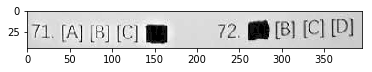

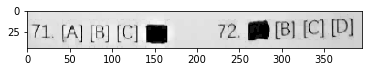

In [53]:
morph_op_dic = {0: cv.MORPH_OPEN, 1: cv.MORPH_CLOSE, 2: cv.MORPH_GRADIENT, 3: cv.MORPH_TOPHAT, 4: cv.MORPH_BLACKHAT}

def morphology_operations(val):
    morph_operator = 0
    morph_size = 1
    morph_elem = 0
    val_type = val
    if val_type == 0:
        morph_elem = cv.MORPH_RECT
    elif val_type == 1:
        morph_elem = cv.MORPH_CROSS
    elif val_type == 2:
        morph_elem = cv.MORPH_ELLIPSE
    element = cv.getStructuringElement(morph_elem, (2*morph_size + 1, 2*morph_size+1), (morph_size, morph_size))
    operation = morph_op_dic[morph_operator]
    dst = cv.morphologyEx(src, operation, element,borderType=cv.BORDER_DEFAULT, iterations=1 )
    plt.imshow(dst,'gray')
    plt.show()
    
src = cv.imread('/home/hecong/004.png',cv.IMREAD_GRAYSCALE)
plt.imshow(src,'gray')
plt.show()

src = morphology_operations(0)    

# Closing

    It is obtained by the dilation of an image followed by an erosion.
    dst=close(src,element)=erode(dilate(src,element))
    Useful to remove small holes (dark regions).

![Image of Yaktocat](https://docs.opencv.org/master/Morphology_2_Tutorial_Theory_Closing.png) 



# Extract horizontal and vertical lines by using morphological operations

    1. adaptiveThreshold   https://docs.opencv.org/master/d7/d1b/group__imgproc__misc.html#ga72b913f352e4a1b1b397736707afcde3
       dst	=	cv.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst]	)
       Parameters
        src	Source 8-bit single-channel image.
        dst	Destination image of the same size and the same type as src.
        maxValue	Non-zero value assigned to the pixels for which the condition is satisfied
        adaptiveMethod	Adaptive thresholding algorithm to use, see AdaptiveThresholdTypes. The BORDER_REPLICATE | BORDER_ISOLATED is used to process boundaries.
        thresholdType	Thresholding type that must be either THRESH_BINARY or THRESH_BINARY_INV, see ThresholdTypes.
        blockSize	Size of a pixel neighborhood that is used to calculate a threshold value for the pixel: 3, 5, 7, and so on.
        C	Constant subtracted from the mean or weighted mean (see the details below). Normally, it is positive but may be zero or negative as well.
        
        
    2. blur https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#ga8c45db9afe636703801b0b2e440fce37
    
        dst	=	cv.blur(	src, ksize[, dst[, anchor[, borderType]]]	)
        Blurs an image using the normalized box filter.

        The function smooths an image using the kernel:
        The call blur(src, dst, ksize, anchor, borderType) is equivalent to boxFilter(src, dst, src.type(), anchor, true, borderType).

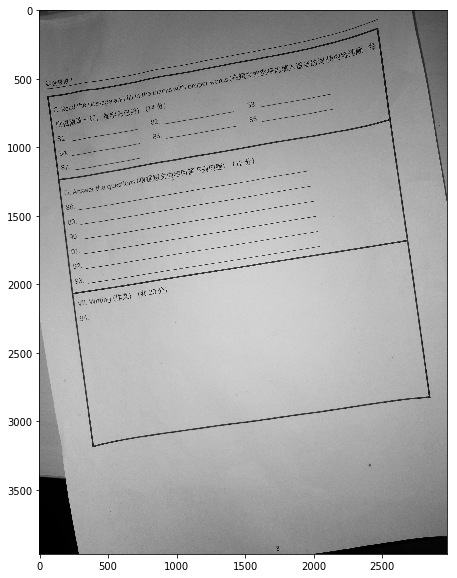

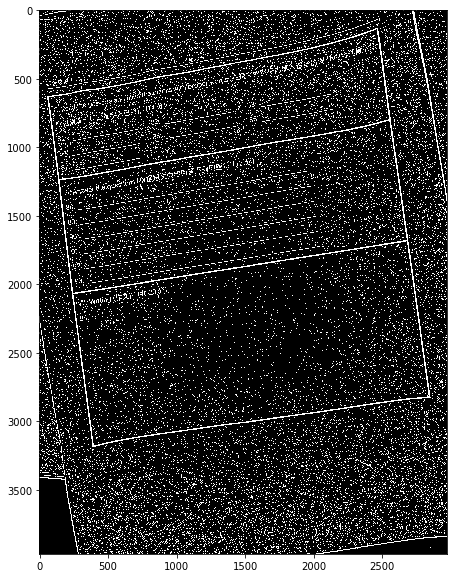

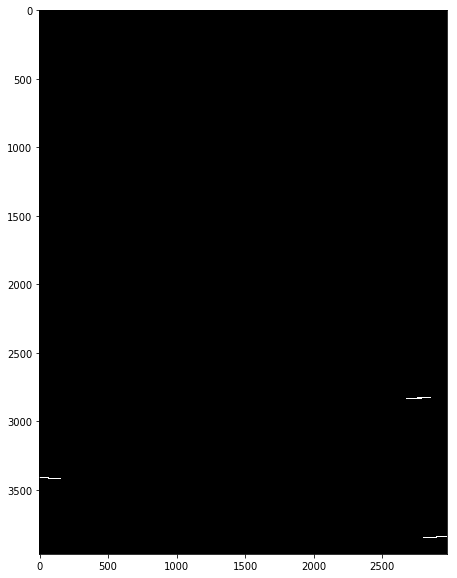

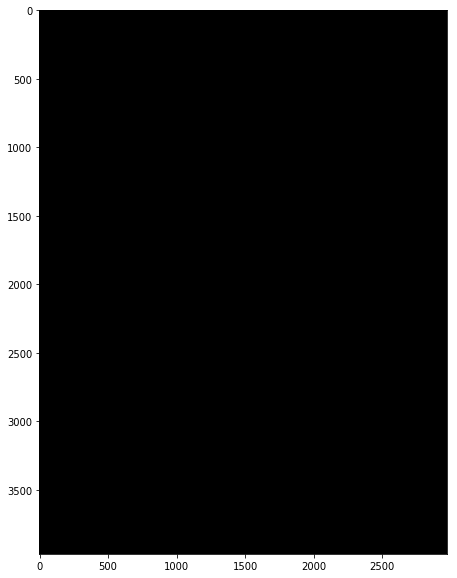

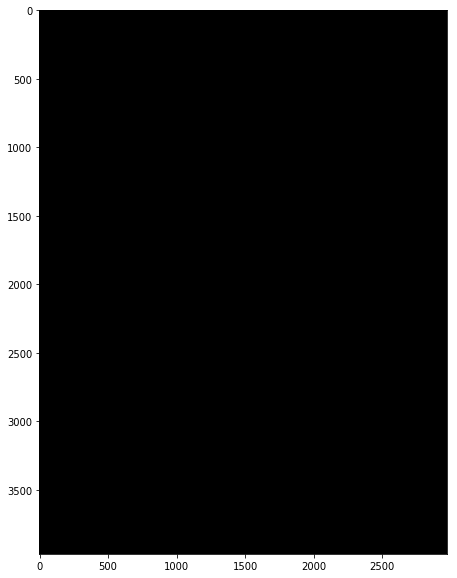

In [15]:
# src = cv.imread('ns.png', cv.IMREAD_GRAYSCALE)
src = cv.imread('/home/hecong/x001.jpg',cv.IMREAD_GRAYSCALE)
plt.imshow(src,'gray')
plt.show()

# Apply adaptiveThreshold at the bitwise_not of gray, notice the ~ symbol
gray = cv.bitwise_not(src)   # Inverts every bit of an array.  255 -> 0   0 -> 255
bw = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, \
                                cv.THRESH_BINARY, 15, -2)
plt.imshow(bw,'gray')
plt.show()


horizontal = np.copy(bw)
vertical = np.copy(bw)

# Specify size on horizontal axis
cols = horizontal.shape[1]
horizontal_size = int(cols / 30)    # ? ? ?

# Create structure element for extracting horizontal lines through morphology operations
horizontalStructure = cv.getStructuringElement(cv.MORPH_RECT, (horizontal_size, 1))
# Apply morphology operations
horizontal = cv.erode(horizontal, horizontalStructure)
horizontal = cv.dilate(horizontal, horizontalStructure)

plt.imshow(horizontal,'gray')
plt.show()

# Specify size on vertical axis
rows = vertical.shape[0]
verticalsize = int(rows / 20)
# Create structure element for extracting vertical lines through morphology operations
verticalStructure = cv.getStructuringElement(cv.MORPH_RECT, (1, verticalsize))

# Apply morphology operations
vertical = cv.erode(vertical, verticalStructure)
vertical = cv.dilate(vertical, verticalStructure)
vertical = cv.bitwise_not(vertical)
plt.imshow(vertical,'gray')
plt.show()

'''
Extract edges and smooth image according to the logic
1. extract edges
2. dilate(edges)
3. src.copyTo(smooth)
4. blur smooth img
5. smooth.copyTo(src, edges)
'''


# Step 1
edges = cv.adaptiveThreshold(vertical, 255, cv.ADAPTIVE_THRESH_MEAN_C, \
                            cv.THRESH_BINARY, 3, -2)
plt.imshow(edges,'gray')
# Step 2
kernel = np.ones((2, 2), np.uint8)
edges = cv.dilate(edges, kernel)

# Step 3
smooth = np.copy(vertical)
# Step 4
smooth = cv.blur(smooth, (2, 2))

# Step 5
(rows, cols) = np.where(edges != 0)
vertical[rows, cols] = smooth[rows, cols]
plt.imshow(vertical,'gray')
plt.show()




# Finding contours in your image  图片边框

    https://docs.opencv.org/master/df/d0d/tutorial_find_contours.html
    
    https://www.bogotobogo.com/python/OpenCV_Python/python_opencv3_Image_Gradient_Sobel_Laplacian_Derivatives_Edge_Detection.php
    
    1. Canny
    
        edges	=	cv.Canny(	image, threshold1, threshold2[, edges[, apertureSize[, L2gradient]]]	)
        edges	=	cv.Canny(	dx, dy, threshold1, threshold2[, edges[, L2gradient]]
    
        This is an overloaded member function, provided for convenience. It differs from the above function only in what argument(s) it accepts.   Finds edges in an image using the Canny algorithm with custom image gradient.
    
    2. findContours  
        https://blog.csdn.net/yiqiudream/article/details/51858421
        https://docs.opencv.org/master/d3/dc0/group__imgproc__shape.html#ga95f5b48d01abc7c2e0732db24689837b
        image, contours, hierarchy	=	cv.findContours(	image, mode, method[, contours[, hierarchy[, offset]]]	)
        
        The function retrieves contours from the binary image using the algorithm [177] . The contours are a useful tool for shape analysis and object detection and recognition. See squares.cpp in the OpenCV sample directory.
        
    Parameters
        image	Source, an 8-bit single-channel image. Non-zero pixels are treated as 1's. Zero pixels remain 0's, so the image is treated as binary . You can use compare, inRange, threshold , adaptiveThreshold, Canny, and others to create a binary image out of a grayscale or color one. If mode equals to RETR_CCOMP or RETR_FLOODFILL, the input can also be a 32-bit integer image of labels (CV_32SC1).
    contours	Detected contours. Each contour is stored as a vector of points (e.g. std::vector<std::vector<cv::Point> >).
    hierarchy	Optional output vector (e.g. std::vector<cv::Vec4i>), containing information about the image topology. It has as many elements as the number of contours. For each i-th contour contours[i], the elements hierarchy[i][0] , hierarchy[i][1] , hierarchy[i][2] , and hierarchy[i][3] are set to 0-based indices in contours of the next and previous contours at the same hierarchical level, the first child contour and the parent contour, respectively. If for the contour i there are no next, previous, parent, or nested contours, the corresponding elements of hierarchy[i] will be negative.
    mode	Contour retrieval mode, see RetrievalModes
    method	Contour approximation method, see ContourApproximationModes
    offset	Optional offset by which every contour point is shifted. This is useful if the contours are extracted from the image ROI and then they should be analyzed in the whole image context.        
    
    mode 
        提取模式. 
        CV_RETR_EXTERNAL - 只提取最外层的轮廓 
        CV_RETR_LIST - 提取所有轮廓，并且放置在 list 中 
        CV_RETR_CCOMP - 提取所有轮廓，并且将其组织为两层的 hierarchy: 顶层为连通域的外围边界，次层为洞的内层边界。 
        CV_RETR_TREE - 提取所有轮廓，并且重构嵌套轮廓的全部 hierarchy  
        
    method 
        逼近方法 (对所有节点, 不包括使用内部逼近的 CV_RETR_RUNS). 
        CV_CHAIN_CODE - Freeman 链码的输出轮廓. 其它方法输出多边形(定点序列). 
        CV_CHAIN_APPROX_NONE - 将所有点由链码形式翻译(转化）为点序列形式 
        CV_CHAIN_APPROX_SIMPLE - 压缩水平、垂直和对角分割，即函数只保留末端的象素点; 
        CV_CHAIN_APPROX_TC89_L1, 
        CV_CHAIN_APPROX_TC89_KCOS - 应用 Teh-Chin 链逼近算法. CV_LINK_RUNS - 通过连接为 1 的水平碎片使用完全不同的轮廓提取算法。仅有 CV_RETR_LIST 提取模式可以在本方法中应用.      
        
    offset 
        每一个轮廓点的偏移量. 当轮廓是从图像 ROI 中提取出来的时候，使用偏移量有用，因为可以从整个图像上下文来对轮廓做分析. 
        函数 cvFindContours 从二值图像中提取轮廓，并且返回提取轮廓的数目。指针 first_contour 的内容由函数填写。它包含第一个最外层轮廓的指针，如果指针为 NULL，则没有检测到轮廓（比如图像是全黑的）。其它轮廓可以从 first_contour 利用 h_next 和 v_next 链接访问到。 在 cvDrawContours 的样例显示如何使用轮廓来进行连通域的检测。轮廓也可以用来做形状分析和对象识别 - 见CVPR2001 教程中的 squares 样例。该教程可以在 SourceForge 网站上找到。         
        
        
    3. Sobel
    
    4. HoughLinesP
        lines = cv2.HoughLinesP(edges, 1,np.pi/180, 80, minLineLength, maxLineGap)  # 180度扫描
        minLineLength-线的最短长度，比这个线短的都会被忽略。
        maxLineGap-两条线之间的最大间隔，如果小于此值，这两条线就会被看成一条线        


In [16]:
import random as rng
def thresh_callback(val):
    threshold = val
    # Detect edges using Canny
    global src_gray
    src_gray = cv.Canny(src_gray, threshold, threshold * 2)
    # Find contours
    _, contours, hierarchy = cv.findContours(src_gray, cv.RETR_TREE,  cv.CHAIN_APPROX_NONE)
    print(len(contours))
    # Draw contours
    drawing = np.zeros((src_gray.shape[0], src_gray.shape[1], 3), dtype=np.uint8)
    for i in range(len(contours)):
        cnt = contours[i] 
#         print(cnt)
        rect = cv.minAreaRect(cnt)
        box = cv.boxPoints(rect)
        box = np.int0(box)      
        hight = abs(box[0][1] - box[2][1])
        width = abs(box[0][0] - box[2][0])        
#         print('x:', box[0][0], ' width:', width, ' y:', box[0][1] ,' hight:', hight)
        color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
        cv.drawContours(drawing, contours, i, color, 2, cv.LINE_8, hierarchy, 0)
    # Show in a window
    plt.imshow(drawing,'gray')
    plt.show()
    
# Convert image to gray and blur it
# src = cv.imread('ns.png', cv.IMREAD_GRAYSCALE)
# src_gray = cv.blur(src, (3,3))
src_gray = cv.blur(horizontal,(5,5))   # 取上面抽取直线的结果
# src_gray = np.copy(horizontal)
element = cv.getStructuringElement(cv.MORPH_RECT, (17,17), (-1, -1))
src_gray = cv.dilate(src_gray, element, iterations=1)
# plt.imshow(src_gray,'gray')
# plt.show()

sobel = cv.Sobel(src_gray, cv.CV_8U, 0, 1, ksize = 9)  #  y求导
# # sobel = cv.Laplacian(src_gray,cv.CV_8U)
# ret, src_gray = cv.threshold(sobel, 0, 255, cv.THRESH_OTSU+cv.THRESH_BINARY)


# plt.imshow(src_gray ,'gray')
# plt.show()
# thresh_callback(100)
# edges = cv.Canny(src_gray,50,200)
# plt.imshow(edges,'gray')
# plt.show()

ret, src_gray = cv.threshold(sobel, 100, 255, cv.THRESH_BINARY)
# plt.imshow(src_gray,'gray')
# plt.show()


element = cv.getStructuringElement(cv.MORPH_RECT, (21,21), (-1, -1))
src_gray = cv.dilate(src_gray, element, iterations=1)
# plt.imshow(src_gray,'gray')
# plt.show()


lines = cv.HoughLinesP(src_gray,1, np.pi / 360, 20, minLineLength=1500, maxLineGap=80)
print(len(lines))
from PIL import Image
image = Image.new("RGB", (src_gray.shape[1], src_gray.shape[0]), (255, 255, 255))
image = np.array(image)
for line in lines:
    x1, y1, x2, y2 = line[0]
    
#     print('x1,y1:',x1,y1,'---',' x2,y2:',x2,y2)
    
    cv.line(image, (x1, y1), (x2, y2), (120, 120, 120), 2)
    
plt.imshow(image)
plt.show()    



TypeError: object of type 'NoneType' has no len()

# 检测图像是否模糊

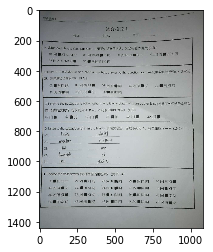

1062.7805314748014


In [3]:
# https://blog.csdn.net/qq_34784753/article/details/72901616?locationNum=1&fps=1

#-*-coding:utf-8-*-
import cv2 
rc = cv2.imread('/home/hecong/t004.jpg',cv2.IMREAD_COLOR)
plt.imshow(rc,'gray')
plt.show()
imageVar=cv2.Laplacian(rc, cv2.CV_64F).var()
print(imageVar)

# 在原图上填加文字

(255, 0, 0)


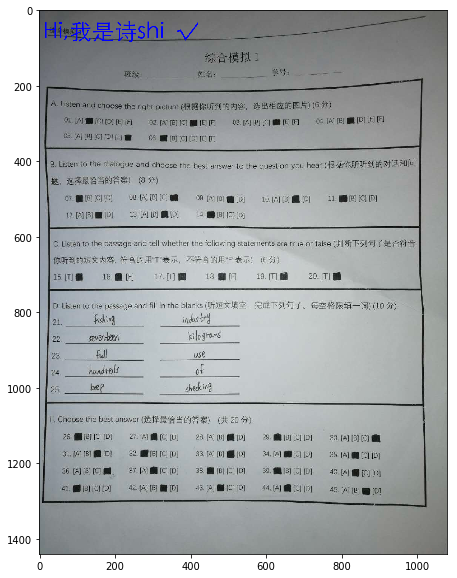

In [27]:
# https://baijiahao.baidu.com/s?id=1588536890529844280&wfr=spider&for=pc
# https://blog.csdn.net/wyx100/article/details/75579581
#-*-coding:utf-8-*-
# import cv2 
# import matplotlib.pyplot as plt
# rc = cv2.imread('/home/hecong/t004.jpg',cv2.IMREAD_COLOR)
# rc = cv2.putText(rc, "测试!", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 255, 0), 2)
# plt.imshow(rc,'gray')
# plt.show()
from PIL import Image, ImageDraw, ImageFont,ImageColor
import numpy as np
cv2img = cv2.imread('/home/hecong/t004.jpg',cv2.IMREAD_COLOR)

pilimg = Image.fromarray(cv2img)
draw = ImageDraw.Draw(pilimg) # 图片上打印
font = ImageFont.truetype("/home/hecong/test.ttf", 60, encoding="utf-8") # 参数1：字体文件路径，参数2：字体大小
draw.text((10, 10), "Hi,我是诗shi  √", ImageColor.getcolor('blue', 'RGB'), font=font) # 参数1：打印坐标，参数2：文本，参数3：字体颜色，参数4：字体 # PIL图片转cv2 图片
cv2charimg = cv2.cvtColor(np.array(pilimg), cv2.cv2.COLOR_BGR2BGRA)
print(ImageColor.getcolor('red', 'RGB'))
plt.imshow(cv2charimg,'brg')
plt.show()



# 判断图片倾斜情况

    http://www.360doc.com/content/17/0225/20/28294195_631980376.shtml
    
    https://jingyan.baidu.com/article/fb48e8bee35e456e622e14b4.html
    
    https://blog.csdn.net/liulina603/article/details/41309169

In [79]:
from PIL import Image
starttime = time.time()
image = cv2.imread('/home/hecong/dplearn/image/image_r_10.jpg',cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(image)
image = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, \
                            cv2.THRESH_BINARY, 15, -2)   # 图片转成二进制图片
#   标准霍夫线变换
#  参数2，3  通过步长为1的半径和步长为π/180的角来搜索所有可能的直线
#  20 --是经过某一点曲线的数量的阈值， 这里采用的是经验值 ？？？
lines = cv2.HoughLinesP(image, 1, np.pi / 180, 80, minLineLength=1000, maxLineGap=20)
exmr = []
lines = lines[:,0,:]
imgn = Image.new("RGB", (image.shape[1], image.shape[0]), (255, 255, 255))
imgn = np.array(imgn)
for line in lines:
    x1, y1, x2, y2 = line
#     if DEBUG:
    
    width = abs(x2-x1)
    high = abs(y2-y1)
    k = (y1-y2)/(x1-x2 + 0.000001)
    
    # 需了解已知三角形怎么求其夹角的计算公司，暂时不了解
    angle = math.atan(k)*180/3.1415926     
    if width > 800:
        cv2.line(imgn, (x1, y1), (x2, y2), (120, 120, 120), 2)
        exmr.append([x1,y1,width,hight,angle])

print('time {}'.format((time.time()-starttime)))
sum = 0
print(exmr)
for item in exmr:
    sum = sum + item[4]
angle = sum/len(exmr)
print(angle)

high, width = image.shape[:2]
center = ((width//2, high//2))
M = cv2.getRotationMatrix2D(center,angle,1.0)
route = cv2.warpAffine(image,M,(width,high),flags=cv2.INTER_CUBIC,borderMode=cv2.BORDER_REPLICATE)




time 1.1027932167053223
[[245, 1118, 1415, 75, -10.019529219111536], [294, 1397, 1385, 75, -9.99145938556634], [261, 1400, 1418, 75, -9.998759544566026], [261, 1401, 1418, 75, -9.998759544566026], [351, 1911, 1206, 75, -9.970032170175205], [245, 1117, 1373, 75, -10.036544553849776], [354, 1910, 1056, 75, -9.989407605906742], [491, 1358, 1187, 75, -10.03276069994845], [545, 1878, 1094, 75, -9.954192365249213], [246, 1119, 1309, 75, -10.007979979650024], [277, 1181, 1370, 75, -10.017522914026664], [280, 1195, 1119, 75, -9.98461064173103], [161, 831, 1272, 75, -9.023507005795052], [310, 1182, 1178, 75, -10.0135292086048], [309, 1177, 1190, 75, -10.007979980399119], [310, 1183, 1206, 75, -9.970032170175205], [310, 1178, 1189, 75, -10.016226746246865], [311, 1188, 1088, 75, -10.007979981171621]]
-9.946711873152205


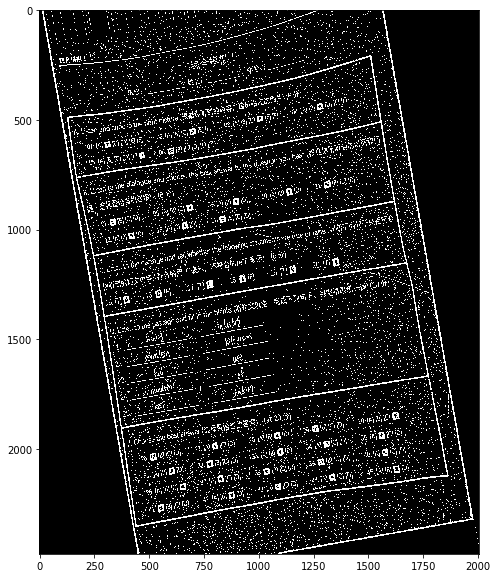

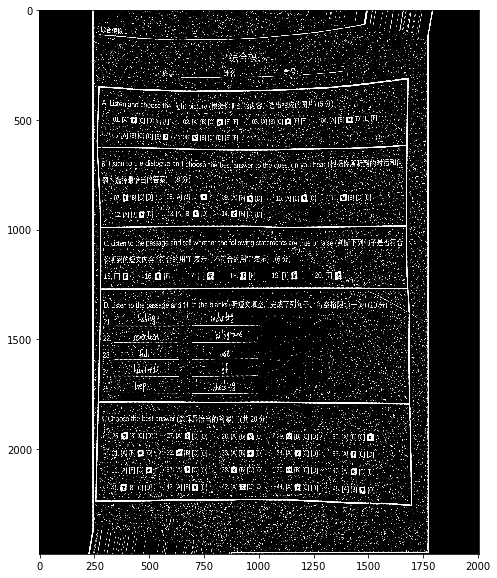

In [80]:
plt.imshow(image,'gray')
plt.show()
plt.imshow(route,'gray')
plt.show()

# 修改图处大小

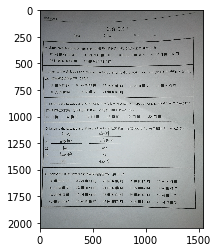

True

In [10]:
import cv2
import matplotlib.pyplot as plt
path = '/home/hecong/t003.jpg'
image = cv2.imread(path, cv2.IMREAD_COLOR)
# 1280X1024
rs = cv2.resize(image, (1536,2048),interpolation=cv2.INTER_CUBIC)
plt.imshow(rs, 'brg')
plt.show()

cv2.imwrite('/home/hecong/t003_rz.jpg',rs)


# 图片翻转

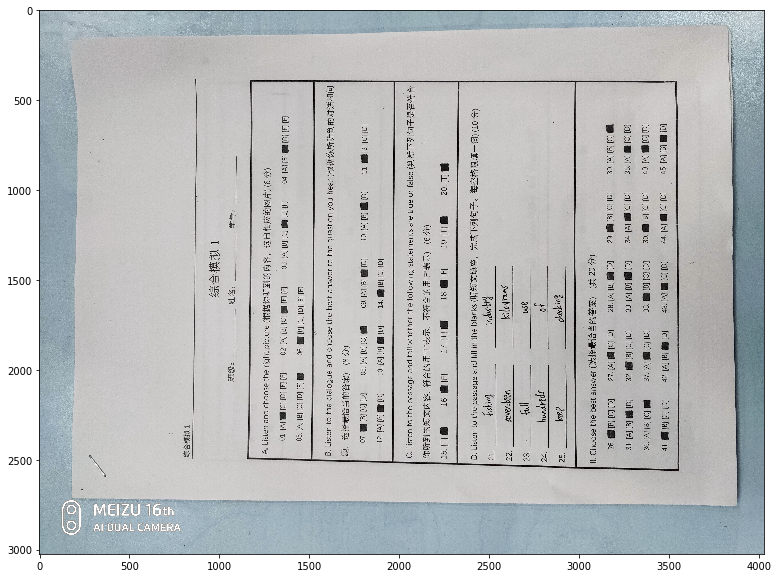

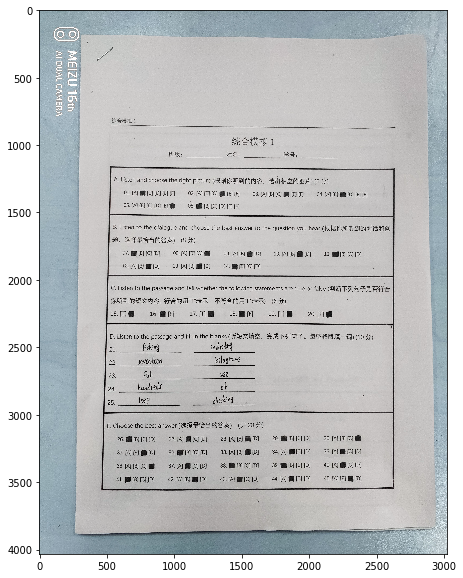

In [30]:
import cv2
import matplotlib.pyplot as plt
from math import *
img = cv2.imread('/home/hecong/meizhu.jpg',cv2.IMREAD_COLOR)
plt.imshow(img,'gray')
plt.show()
# (h, w) = image.shape[:2]
# # center = (w // 2, h // 2)
# center = (0,0)
# M = cv2.getRotationMatrix2D(center, -90 , 1.0)
# route = cv2.warpAffine(image,M,(0,0),flags=cv2.INTER_CUBIC,borderMode=cv2.BORDER_WRAP)
degree=-90
height,width=img.shape[:2]
heightNew=int(width*fabs(sin(radians(degree)))+height*fabs(cos(radians(degree))))
widthNew=int(height*fabs(sin(radians(degree)))+width*fabs(cos(radians(degree))))

matRotation=cv2.getRotationMatrix2D((width/2,height/2),degree,1)
matRotation[0,2] +=(widthNew-width)/2  #重点在这步，目前不懂为什么加这步
matRotation[1,2] +=(heightNew-height)/2  #重点在这步
imgRotation=cv2.warpAffine(img,matRotation,(widthNew,heightNew),borderValue=(255,255,255))

print(cv2.BORDER_WRAP)
plt.imshow(imgRotation,'gray')
plt.show()


# 图片目标检测及取白色区域

In [2]:
# https://m.baidu.com/from=1086k/bd_page_type=1/ssid=0/uid=0/pu=usm%402%2Csz%401320_1002%2Cta%40iphone_2_8.0_2_12137.1/baiduid=6E53727E0AE453629059271342E405FD/w=0_10_/t=iphone/l=3/tc?ref=www_iphone&lid=12100197475032314257&order=10&fm=alop&is_baidu=0&tj=www_normal_10_0_10_title&vit=osres&m=8&srd=1&cltj=cloud_title&asres=1&title=%E5%A6%82%E4%BD%95%E4%BD%BF%E7%94%A8opencv%E6%A3%80%E6%B5%8B%E5%A4%A7%E7%9A%84%E7%99%BD%E8%89%B2%E5%83%8F%E7%B4%A0%E7%9A%84%E5%8C%BA%E5%9F%9F%3F-IT%E5%B1%8B-%E7%A8%8B%E5%BA%8F...&dict=32&wd=&eqid=a7ec897e73613000100000065bc5bbf3&w_qd=IlPT2AEptyoA_yiqDEKjGDKvFlhPi8Anuk5Ymh0SsRcsS3K&tcplug=1&sec=33490&di=9a49f1e0d1bf8ae2&bdenc=1&tch=124.462.274.2439.1.350&nsrc=IlPT2AEptyoA_yixCFOxXnANedT62v3IEQGG_yVEQ7nbz939h47aUbAuFG3aBS4MG6H9u_&clk_type=1&l=1&baiduid=6E53727E0AE453629059271342E405FD&w=0_10_opencv%E7%99%BD%E8%89%B2%E5%8C%BA%E5%9F%9F%E6%A3%80%E6%B5%8B&t=iphone&from=1086k&ssid=0&uid=0&bd_page_type=1&pu=usm%402%2Csz%401320_1002%2Cta%40iphone_2_8.0_2_12137.1&clk_info=%7B%22srcid%22%3A1599%2C%22tplname%22%3A%22www_normal%22%2C%22t%22%3A1539685627122%2C%22xpath%22%3A%22div-a-h3-em2%22%7D

# https://blog.csdn.net/a352611/article/details/51416769  关于BRG, HSV  
# RGB就是指Red,Green和Blue,一副图像由这三个channel(通道)构成  HSV即Hue(色调),Saturation(饱和度)和Value(亮度)三个channel

# https://www.jb51.net/article/137583.htm  颜色检测
# https://blog.csdn.net/sinat_40661696/article/details/80154973

# https://blog.csdn.net/viewcode/article/details/8203728?utm_source=blogxgwz5

# https://www.pyimagesearch.com/2014/08/04/opencv-python-color-detection/

# 目标识别——HSV颜色识别  https://blog.csdn.net/qq_15947787/article/details/72784253?utm_source=blogxgwz0

# detect color space with openCV

# https://stackoverflow.com/questions/2122706/detect-color-space-with-opencv
    
# https://cn.bing.com/search?q=how%20%20detect%20color%20space%20of%20my%20image&qs=n&form=QBRE&sp=-1&pq=how%20detect%20color%20space%20of%20my%20image&sc=0-34&sk=&cvid=84D2026B21504D869FC53CB979EEEFC9    
# image = cv2.imread('/home/hecong/xiaomimax.jpg',cv2.IMREAD_UNCHANGED) 
## hwmate7 360 huiweiry iphone6s xiaomimx xiaomimax meizhus6 meizhu leishi iphonexs iphone8p hwmate7 huiweiry(80) xiami vivo iphonexs
img = cv2.imread('/home/hecong/image/adjust.jpg',cv2.IMREAD_COLOR)

# img_gray = cv2.cvtColor(img, cv2.COLOR_HLS2BGR)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 使用Otsu自动阈值，注意用的是cv2.THRESH_BINARY_INV
ret, thresh = cv2.threshold(
    img_gray, 80, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_TOZERO)   # 小米threshold 100 , leishi 127 huahui 80

# thresh = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 41, -1)
# thresh = cv2.bitwise_not(thresh)
# plt.imshow(thresh,'gray')
# plt.show()
# dilatation_size = 8  # 小米用8
# # element = cv2.getStructuringElement(cv2.MORPH_RECT, (2*dilatation_size+1, 2*dilatation_size+1), (-1, -1))
# thresh = cv2.dilate(thresh,None,iterations=2)
# ret, thresh = cv2.threshold(
#     img_gray, 80, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

plt.imshow(thresh,'gray')
plt.show()
# ret, thresh = cv2.threshold(
#     img_gray, 80, 255, 0)
# 寻找轮廓
image, contours, hierarchy = cv2.findContours(
    thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


rcnt = []
rarea = []
for cnt in contours:
    if cv2.contourArea(cnt) > 5000:
        rarea.append(cv2.contourArea(cnt))
        rcnt.append(cnt)
print(type(rcnt))
pos = np.argmax(rarea)

cnt = rcnt[pos]
x,y,w,h = cv2.boundingRect(cnt)
cv2.rectangle(img,(x,y),(x+w,y+h),0,-1)
print(x , ':' , y , ':' , w , ':' , h)
# print(cnt.shape)
# cv2.drawContours(img, [cnt], 0, (0, 255, 255),8)

plt.imshow(img,'brg')
plt.show()

NameError: name 'cv2' is not defined

# 图片白色区域方案二

black


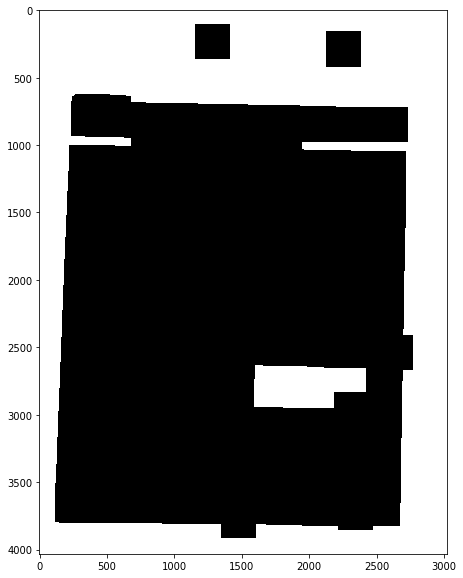

white


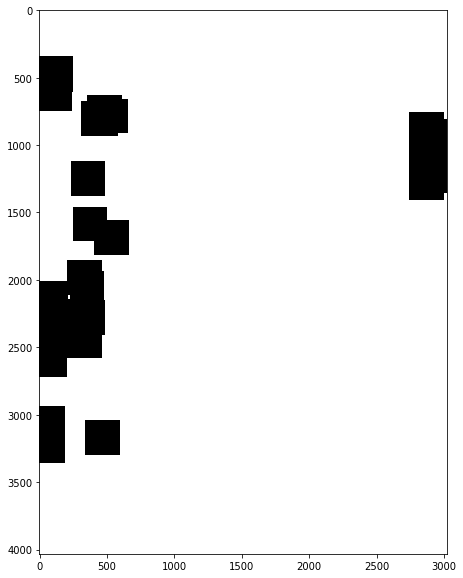

red


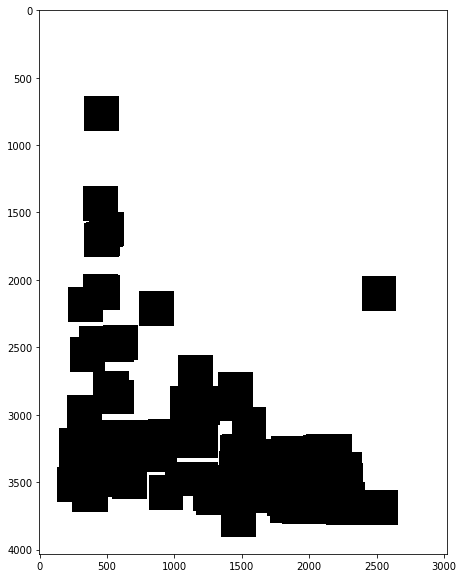

red2


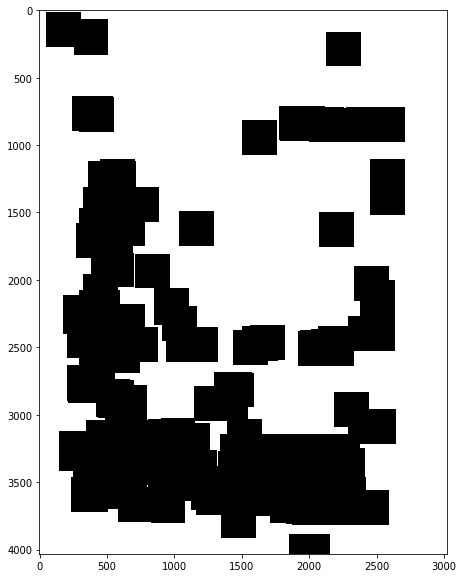

orange


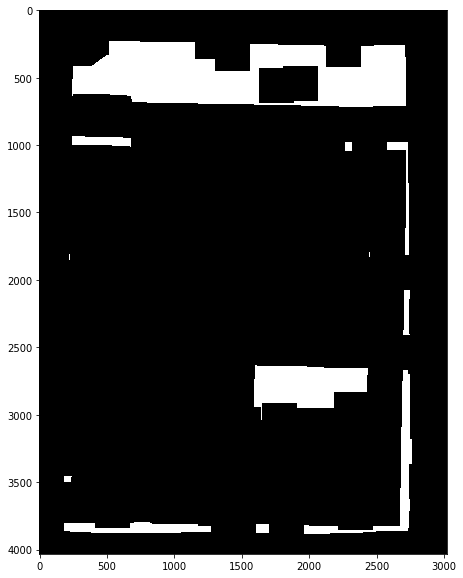

yellow


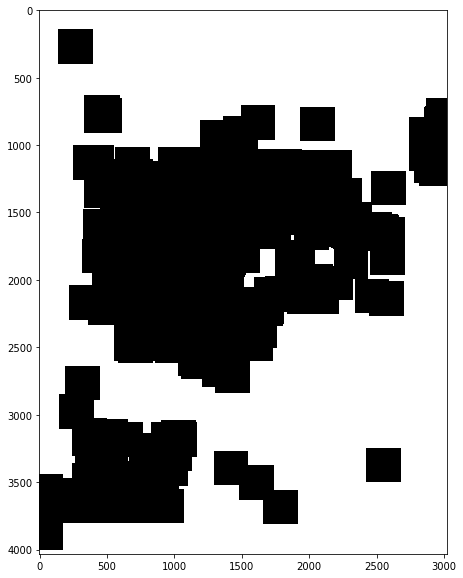

green


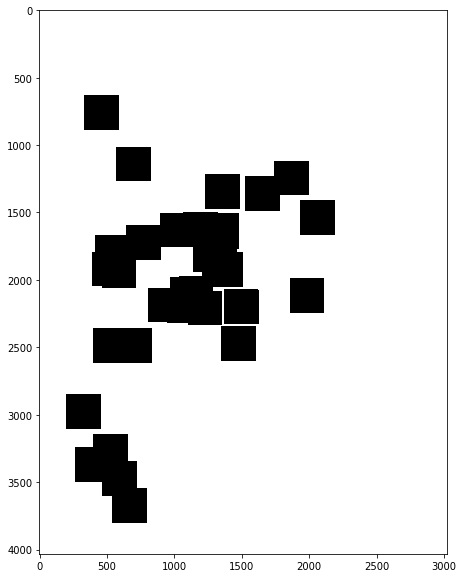

cyan


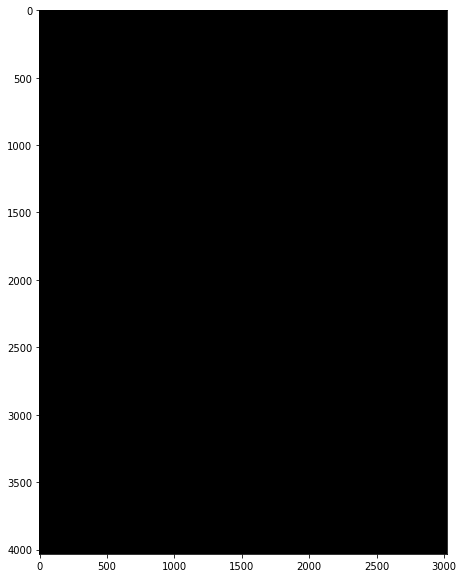

blue


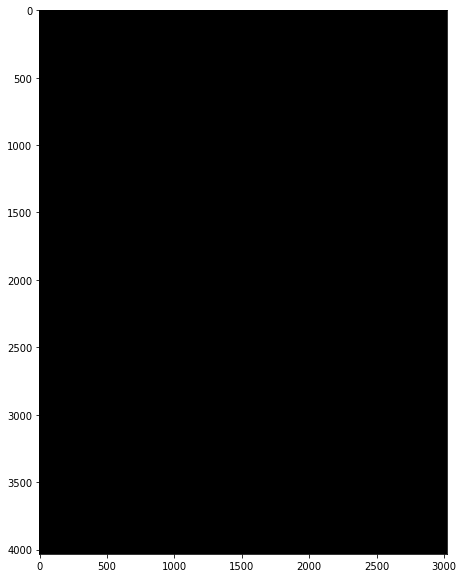

purple


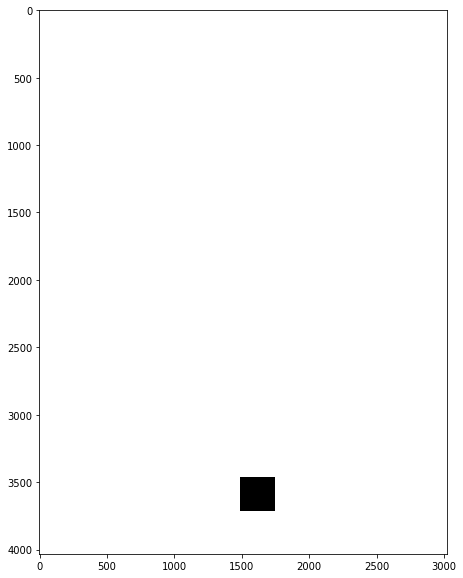

[12185713.0, 11473719.0, 12185713.0, 12139514.0, 5678.0, 62960.5, 102420.0, 215197.5, 13930.5, 25081.0, 27179.0, 930790.5, 11125227.0, 12185713.0, 12185713.0, 12185713.0, 12185713.0]
(4032, 3024)
0 0 3024 4032


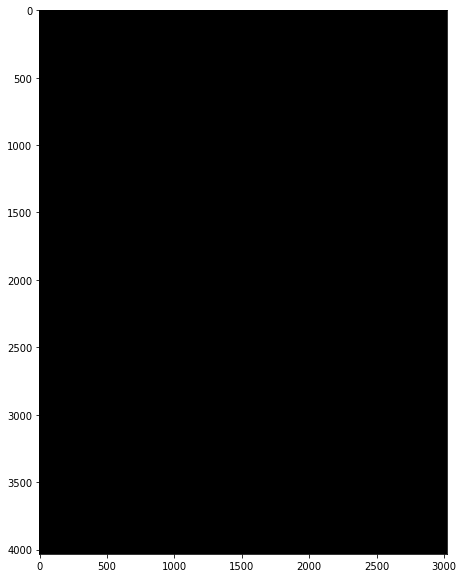

In [420]:
# https://blog.csdn.net/int93/article/details/78954129
# https://blog.csdn.net/xishanbeilu/article/details/51722736?utm_source=blogxgwz8

import collections
def getColorList():
    dict = collections.defaultdict(list)
 
    # 黑色
    lower_black = np.array([0, 0, 0])
    upper_black = np.array([180, 255, 46])
    color_list = []
    color_list.append(lower_black)
    color_list.append(upper_black)
    dict['black'] = color_list
 
    # #灰色
    # lower_gray = np.array([0, 0, 46])
    # upper_gray = np.array([180, 43, 220])
    # color_list = []
    # color_list.append(lower_gray)
    # color_list.append(upper_gray)
    # dict['gray']=color_list
 
    # 白色
    lower_white = np.array([0, 0, 221])
    upper_white = np.array([180, 30, 255])
    color_list = []
    color_list.append(lower_white)
    color_list.append(upper_white)
    dict['white'] = color_list
 
    #红色
    lower_red = np.array([156, 43, 46])
    upper_red = np.array([180, 255, 255])
    color_list = []
    color_list.append(lower_red)
    color_list.append(upper_red)
    dict['red']=color_list
 
    # 红色2
    lower_red = np.array([0, 43, 46])
    upper_red = np.array([10, 255, 255])
    color_list = []
    color_list.append(lower_red)
    color_list.append(upper_red)
    dict['red2'] = color_list
 
    #橙色
    lower_orange = np.array([11, 43, 46])
    upper_orange = np.array([25, 255, 255])
    color_list = []
    color_list.append(lower_orange)
    color_list.append(upper_orange)
    dict['orange'] = color_list
 
    #黄色
    lower_yellow = np.array([26, 43, 46])
    upper_yellow = np.array([34, 255, 255])
    color_list = []
    color_list.append(lower_yellow)
    color_list.append(upper_yellow)
    dict['yellow'] = color_list
 
    #绿色
    lower_green = np.array([35, 43, 46])
    upper_green = np.array([77, 255, 255])
    color_list = []
    color_list.append(lower_green)
    color_list.append(upper_green)
    dict['green'] = color_list
 
    #青色
    lower_cyan = np.array([78, 43, 46])
    upper_cyan = np.array([99, 255, 255])
    color_list = []
    color_list.append(lower_cyan)
    color_list.append(upper_cyan)
    dict['cyan'] = color_list
 
    #蓝色
    lower_blue = np.array([100, 43, 46])
    upper_blue = np.array([124, 255, 255])
    color_list = []
    color_list.append(lower_blue)
    color_list.append(upper_blue)
    dict['blue'] = color_list
 
    # 紫色
    lower_purple = np.array([125, 43, 46])
    upper_purple = np.array([155, 255, 255])
    color_list = []
    color_list.append(lower_purple)
    color_list.append(upper_purple)
    dict['purple'] = color_list
 
    return dict
## hwmate7 360 huiweiry iphone6s xiaomimx xiaomimax meizhus6 meizhu leishi iphonexs(NOT OK) iphone8p hwmate7 huiweiry(80) xiami vivo
img = cv2.imread('/home/hecong/image/iphone8p.jpg') 
imgnew = img.copy()
hsv = img.copy()
# hsv = cv2.cvtColor(img, cv2.COLOR_HLS2BGR)
hsv = cv2.cvtColor(hsv, cv2.COLOR_BGR2HSV)
# hsv = img.copy()
# plt.imshow(hsv,'hsv_r')
# plt.show()
color_dict  = getColorList()
r_cnt = []
r_area = []
for d in color_dict:
    mask = cv2.inRange(hsv,color_dict[d][0],color_dict[d][1])
    binary = cv2.threshold(mask, 1, 255, cv2.THRESH_BINARY)[1]
#     binary =  erosion(0)
    dilatation_size = 8 # 小米用8
    
    element = cv2.getStructuringElement(cv2.MORPH_RECT, (2*dilatation_size+1, 2*dilatation_size+1), (-1, -1))
    binary = cv2.dilate(binary,element,iterations=16)  # 小米用16
#     binary = cv2.dilate(binary,element,iterations=16)
#     binary = cv2.erode(binary,element,iterations=16)
    binary = cv2.bitwise_not(binary)
    print(d)
    plt.imshow(binary,'gray')
    plt.show()
    img, cnts, hiera = cv2.findContours(binary.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    for cnt in cnts:
        area = cv2.contourArea(cnt)
        if area > 5000:
            r_area.append(area)
            r_cnt.append(cnt)

print(r_area)
# cnt = rcnt[pos]
# x,y,w,h = cv2.boundingRect(cnt)
# cv2.rectangle(img,(x,y),(x+w,y+h),0,-1)

pos = np.argmax(r_area)
x,y,w,h = cv2.boundingRect(r_cnt[pos])
print(img.shape)
print(x,y,w,h)
# value = cv2.minAreaRect(r_cnt[pos])
# print(r_cnt[pos][0])
# print(value)
cv2.rectangle(imgnew,(x,y),(x+w,y+h),0,-1)
plt.imshow(imgnew,'gray')
plt.show()
